In [1]:
!ls


Untitled.ipynb             winemag-data-130k-v2.json
winemag-data-130k-v2.csv   winemag-data_first150k.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
reviews= pd.read_csv('winemag-data-130k-v2.csv')

In [4]:
reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
##viewing some random data
reviews.iloc[[0,12,56,110]]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
56,56,US,"This is weighty, creamy and medium to full in ...",NaN,85,14.0,California,North Coast,North Coast,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
110,110,France,Produced from cru vines at the base of Mount B...,Les Quartelets,87,23.0,Beaujolais,Brouilly,NaN,Roger Voss,@vossroger,Pardon et Fils 2015 Les Quartelets (Brouilly),Gamay,Pardon et Fils


### I wanna know how many unique countries are there,adn what is distribution of points (for now we will not consider Nan we will cover that later on)

In [6]:
countrydf=reviews.country.value_counts()

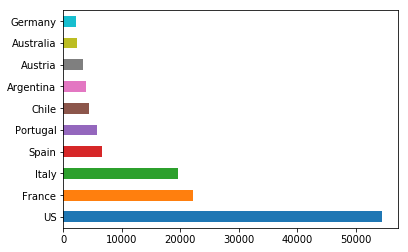

In [7]:
##top 10 countries
countrydf[0:10].plot(kind='barh')

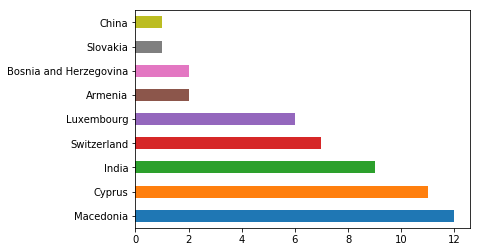

In [8]:
##bottom 10 countries
countrydf[-10:-1].plot(kind='barh')

### Us,france italy are among top producers while egypt china Bosnia.. produces very few variety's of wine

### Lets see which variery's of wines are best buy for money

In [9]:
bestbuy  = reviews[['title','points','price','variety','country']].set_index('title')
bestbuy['economy'] = bestbuy.points/bestbuy.price
bestbuy=bestbuy.sort_values(by='economy',ascending=False)
bestbuy.head()

,points,price,variety,country,economy
title,,,,,
Bandit NV Merlot (California),86,4.0,Merlot,US,21.50
Cramele Recas 2011 UnWineD Pinot Grigio (Viile Timisului),86,4.0,Pinot Grigio,Romania,21.50
Dancing Coyote 2015 White (Clarksburg),85,4.0,White Blend,US,21.25
Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla),85,4.0,Syrah,Spain,21.25
Bandit NV Merlot (California),84,4.0,Merlot,US,21.00


### Graphical view of points and price

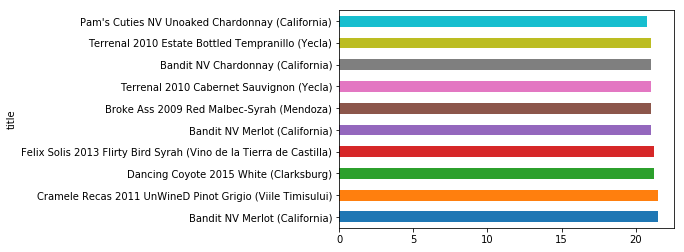

In [10]:
bestbuy['economy'][0:10].plot(kind='barh')

### Above graph shows most best buy for money

### lets see some of the cheapest wine

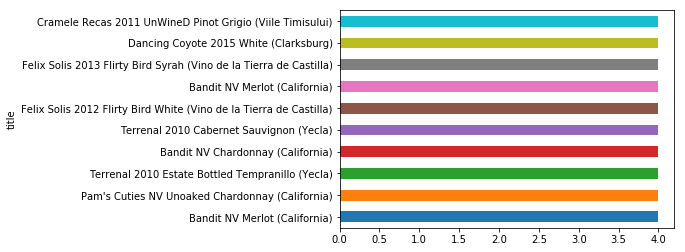

In [11]:
bestbuy.sort_values(by='price')[0:10]['price'].plot(kind='barh')

### do cheapest wines are best buy for money?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ca3bd30>,
      dtype=object)

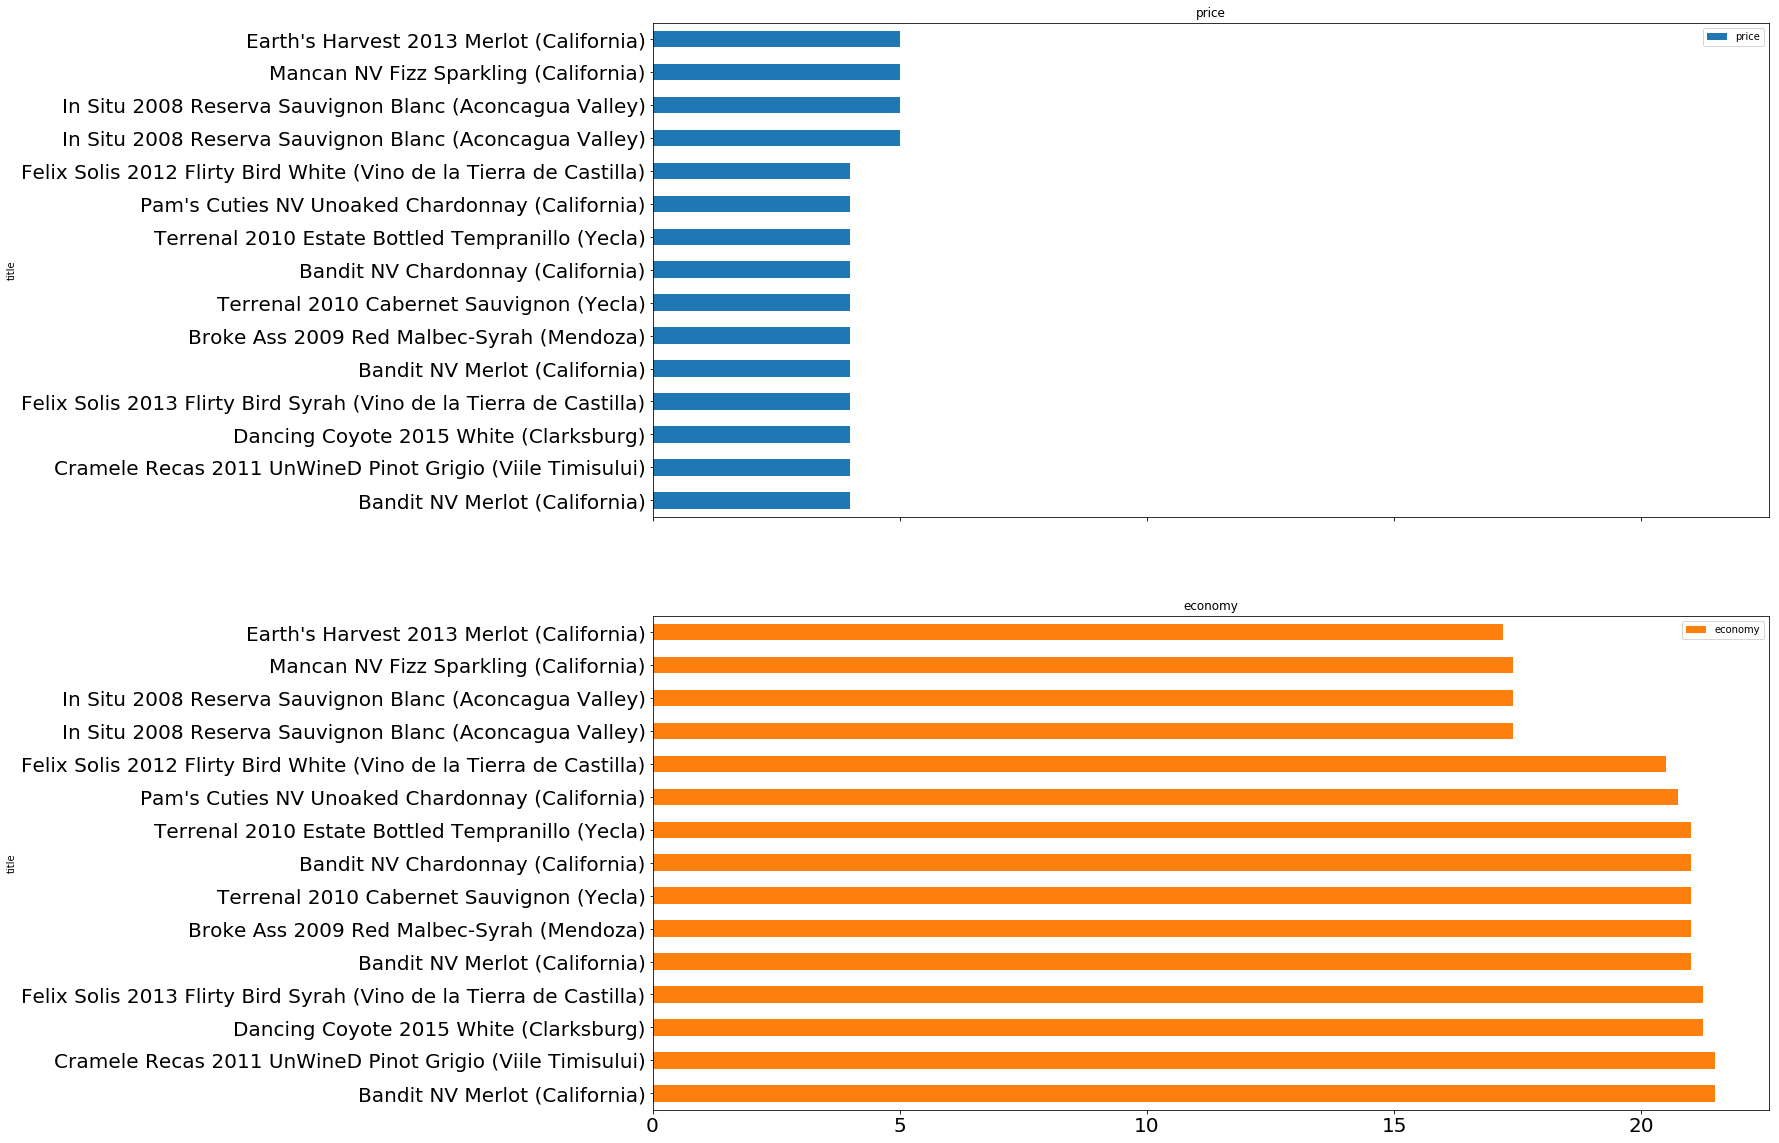

In [12]:
bestbuy.sort_values(by=['economy','price'],ascending=[False,True])[0:15][['price','economy']]\
.plot(kind='barh',subplots=True,figsize=(20,20),fontsize=20)

### Economical wines are cheaper, as the price increases,wine is not economical (do the points get low?)

In [13]:
bestbuy[['price','economy','points']].corr()

,price,economy,points
price,1.000000,-0.521180,0.416167
economy,-0.521180,1.000000,-0.547842
points,0.416167,-0.547842,1.000000


### We can cleary see that economy is strongly -vely correlated with price and points 

### Top 10 country produces most economical wines

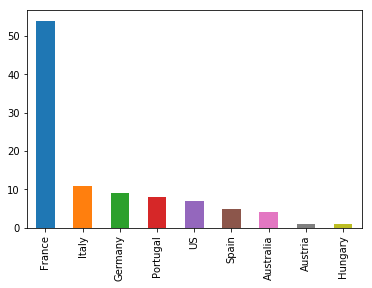

In [14]:
eco100=bestbuy.sort_values(by='economy')[0:100]
eco100['country'].value_counts().plot(kind='bar')

### Top 10 country produces most number of wines

54504


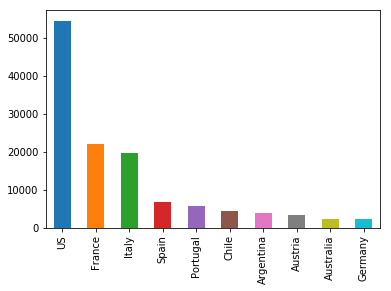

In [15]:
bestbuy['country'].value_counts()[0:10].plot(kind='bar')
print(bestbuy['country'].value_counts()[0])

### We can cleary see insights over there, us being top producer is in 5th while producing most economical
### where as france produces most economical wines
### P.S chile might be producing some of the expensive wines

### Which variety is most common and produced by which country

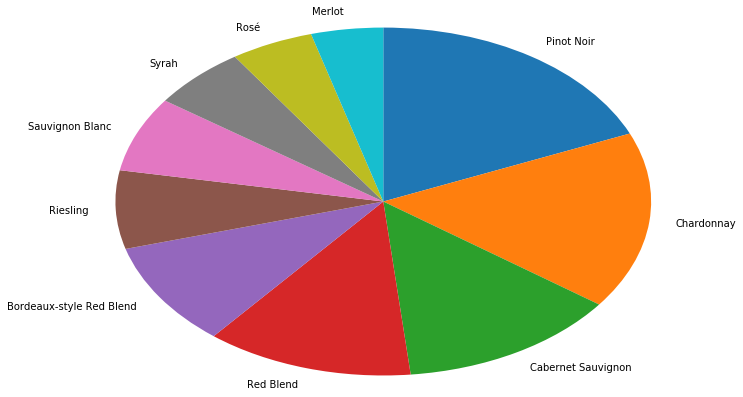

In [16]:
df=bestbuy.variety.value_counts()[0:10]
plt.pie(df,labels=df.index,radius=2,startangle=90,counterclock=False)
plt.show()

### Pinot Noir is the most famous variety

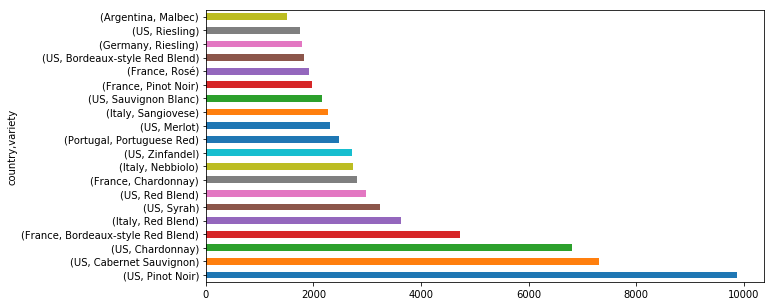

In [17]:
df = bestbuy.groupby(['country','variety']).size()
df.sort_values(ascending=False)[0:20].plot(kind='barh',figsize=(10,5))

### Us produces top three variety

### who are most common wine reviewers

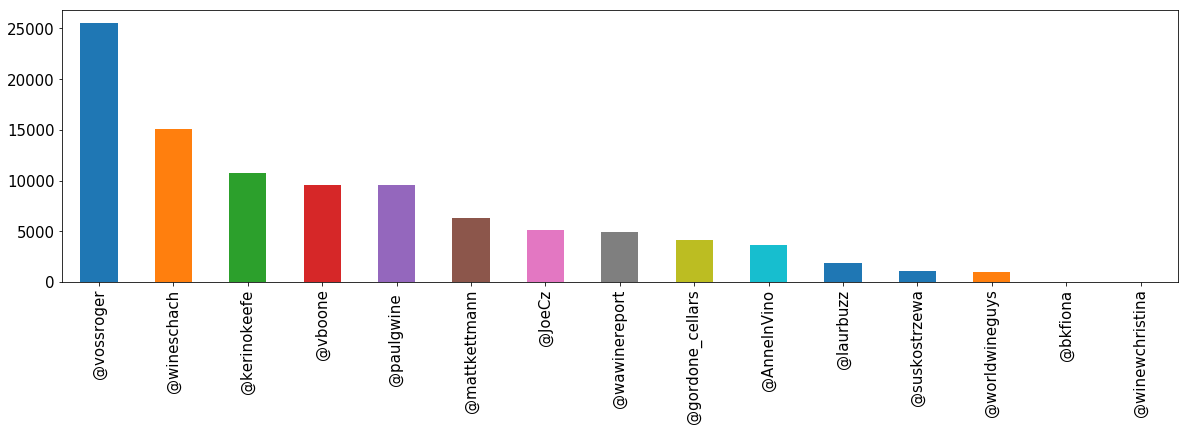

In [18]:
reviewers = reviews.taster_twitter_handle.value_counts()
reviewers.plot(kind='bar',figsize=(20,5),fontsize=15)

### count of top5 wines points wise

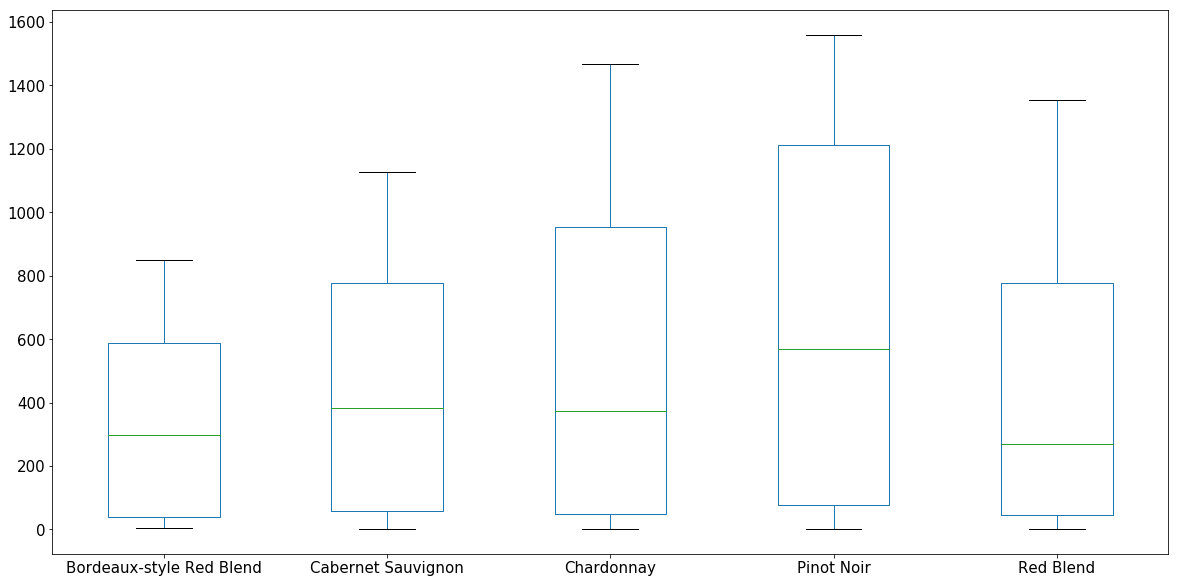

In [19]:
df=reviews.variety.value_counts()[0:5]
top5  = reviews[reviews.variety.isin(df.index.values)]
points=top5.pivot_table(index='points',columns='variety',aggfunc='count',values='title')

points.plot(kind='box',figsize=(20,10),fontsize=15)

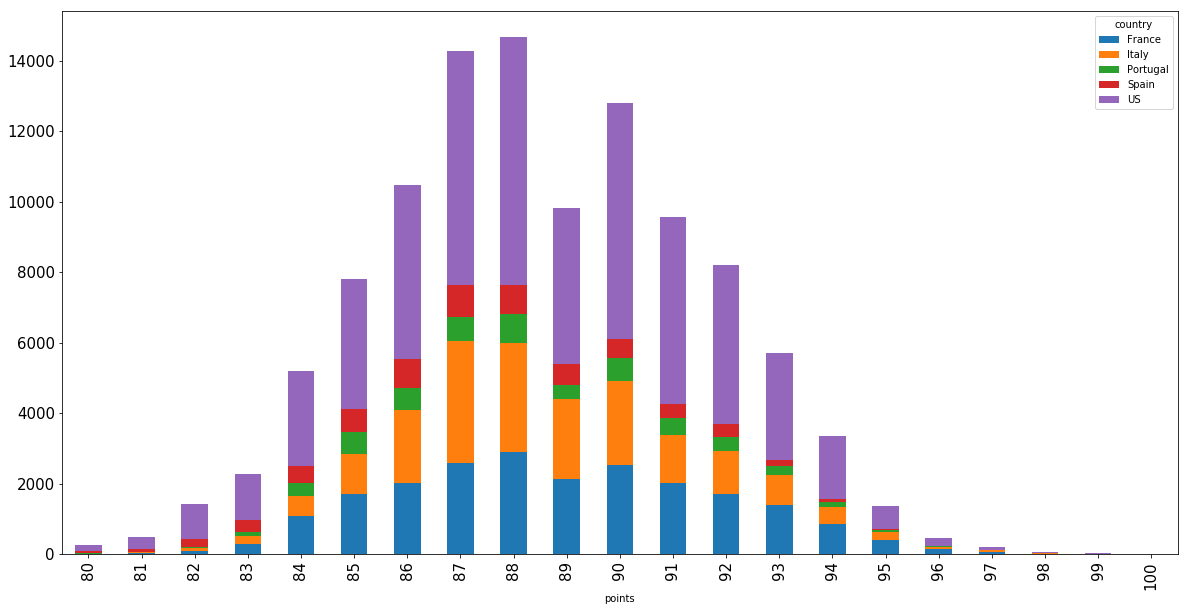

In [20]:
df=reviews.country.value_counts()[0:5]
top5  = reviews[reviews.country.isin(df.index.values)]
points=top5.pivot_table(index='points',columns='country',aggfunc='count',values='title')

points.plot(kind='bar',stacked=True,figsize=(20,10),fontsize=15)

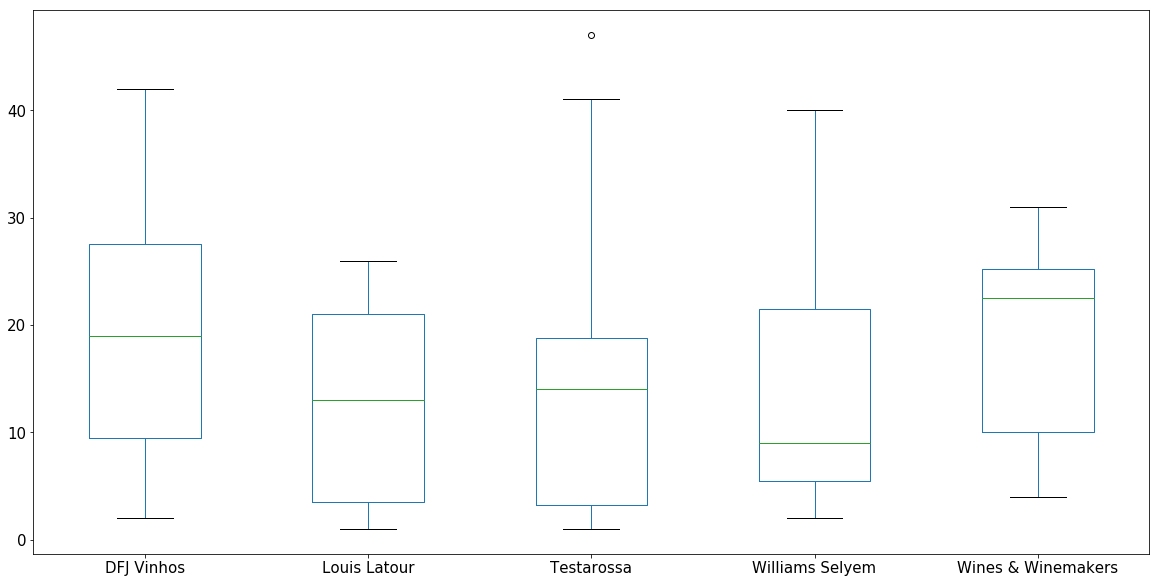

In [21]:
df=reviews.winery.value_counts()[0:5]
top5  = reviews[reviews.winery.isin(df.index.values)]
points=top5.pivot_table(index='points',columns='winery',aggfunc='count',values='title')
points.plot(kind='box',stacked=True,figsize=(20,10),fontsize=15)

### This is an example of categorical vs continous variable bivariate exploration

### which province produces more number of wines

85.2870588235294


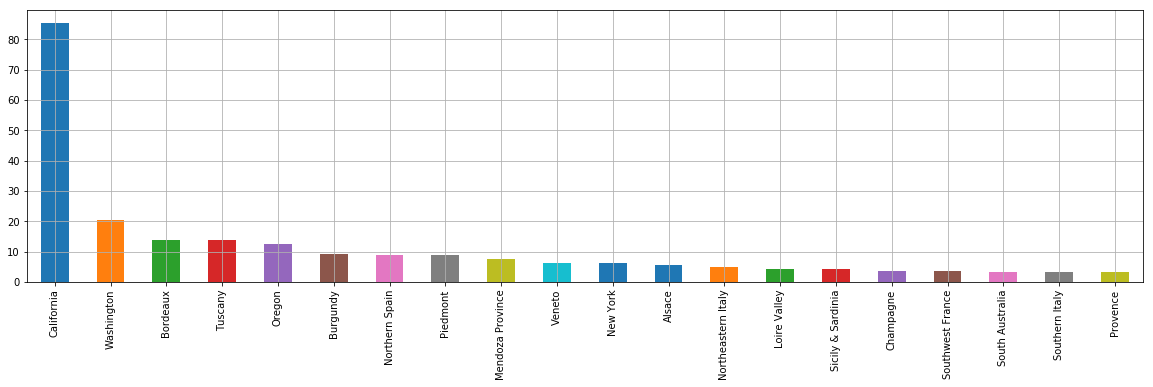

In [22]:
df=reviews.province.value_counts()
df= df/df.size
df[0:20].plot(kind='bar',figsize=(20,5),grid=True)
print(df[0])

### California  produces a very large amount of wines(85.29),lets see which region produces more wines in  california

24.88888888888889


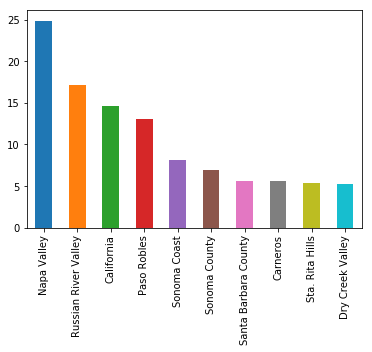

In [23]:
df=reviews[reviews.province=='California'].region_1.value_counts()
df = df/df.size
df[0:10].plot(kind='bar')
print(df[0])

### California includes napa valley which produces 24.88% of california's wines

### how much no of bottles of different variety is produced inCalifornia  ?

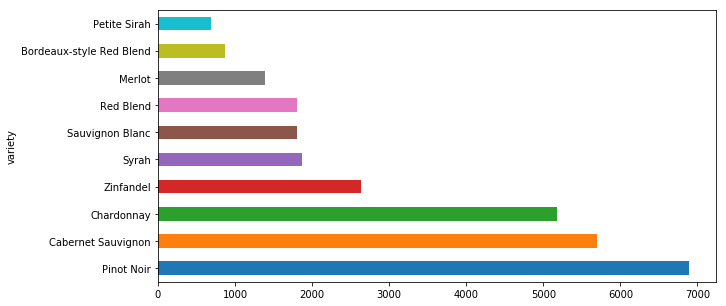

In [24]:
df=reviews[reviews.province=='California']
df= df.groupby(['variety']).size()
df.sort_values(ascending=False)[0:10].plot(kind='barh',figsize=(10,5))

### after seeing some meaningful insights,Lets handle now missing data and explore it futher

In [25]:
reviews.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

### we dont have any null in points, but we do have null in country,province,taster_twitter_handle which are imp to us

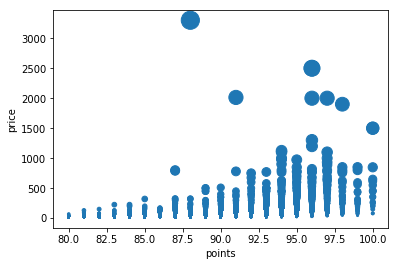

In [26]:
reviews[['points','price']].plot(kind='scatter',x='points',y='price',s=reviews.price/10)

### we can see there are some outliers in our data

In [27]:
reviews.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [28]:
##FILLING MISSING PRICE COLUMNS WITH POINTS* MEAN(ECONOMY) WHERE ECONOMY = POINTS/PRICE
mean=np.mean(reviews.points/reviews.price)
reviews.price.fillna(reviews.points*mean,inplace=True)

In [29]:
reviews.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                        0
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [30]:
## we are not intersted in region_1,region_2 taster_name and its handle so we can leave that
## but country and province are important which are 63
print(reviews.isnull().sum()/reviews.size)
print(reviews.size)

Unnamed: 0               0.000000e+00
country                  3.462311e-05
description              0.000000e+00
designation              2.058976e-02
points                   0.000000e+00
price                    0.000000e+00
province                 3.462311e-05
region_1                 1.167678e-02
region_2                 4.366908e-02
taster_name              1.442300e-02
taster_twitter_handle    1.715383e-02
title                    0.000000e+00
variety                  5.495731e-07
winery                   0.000000e+00
dtype: float64
1819594


### this is a very small percentage nd we can ignore them by dropping those rows


In [31]:
reviews.dropna(subset=['country','province','variety'],inplace=True)
reviews.isnull().sum()

Unnamed: 0                   0
country                      0
description                  0
designation              37453
points                       0
price                        0
province                     0
region_1                 21183
region_2                 79396
taster_name              26243
taster_twitter_handle    31212
title                        0
variety                      0
winery                       0
dtype: int64

### okay now data looks a bit clean, and now we can perform analysis

points       AxesSubplot(0.125,0.125;0.352273x0.755)
price     AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

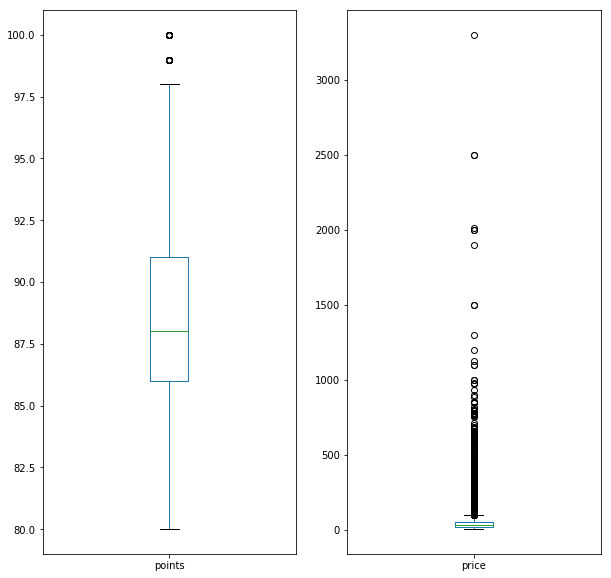

In [32]:
reviews[['points','price']].plot(kind='box',figsize=(10,10),subplots=True)


### there are wines which are  exceptionally good earning points almost close to 100
### while there are also some wines which are more expnsive
# These are outliers

In [33]:
print(str(reviews[reviews.points>95].size / reviews.size)+' is percentage of wines that are having more than 95 points')

0.00678177465417568 is percentage of wines that are having more than 95 points


In [34]:
print(str(reviews[reviews.price>500].size / reviews.size)+' is percentage of wines that are having more than 500$ price')

0.0007005011277298375 is percentage of wines that are having more than 500$ price


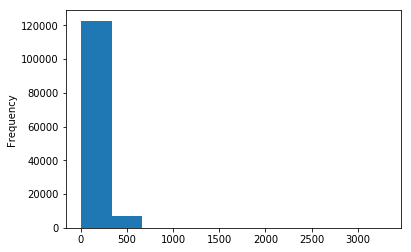

In [39]:
reviews.price.plot(kind='hist')

### we can clearly see that graph is unable to detect values because of outlier,use log to have proper graph

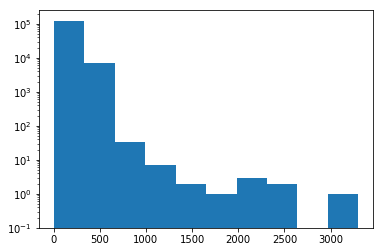

In [55]:
plt.hist(reviews.price,log=True,histtype='stepfilled')
plt.show()